In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 


In [2]:
#get train data
train = pd.read_csv('../apartment/train.csv')
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [3]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

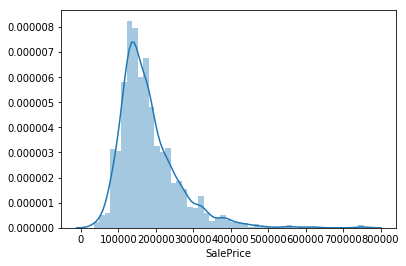

In [4]:
sns.distplot(train['SalePrice'])

In [5]:
#skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [6]:
# Relationship between features and SalePrice

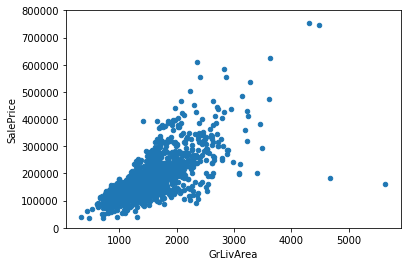

In [7]:
# Scatter plot grlivarea/SalePrice
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

In [8]:
# As we can see from the above pic, the GrLivArea and SalePrice have linear realtionship

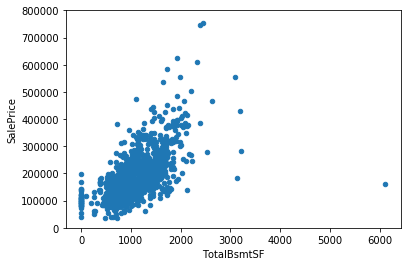

In [9]:
# Scatter plot totalbsmtsf/SalePrice
var = 'TotalBsmtSF'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

In [10]:
# As we can see from the above pic, the GrLivArea and SalePrice have strong linear realtionship

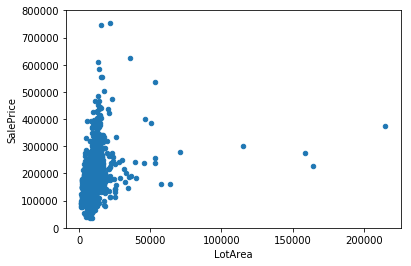

In [11]:
# Scatter plot lotArea/SalePrice
var ='LotArea'
data = pd.concat([train['SalePrice'],train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

In [12]:
# as we can see the LotArea is not relate to the SalePrice

(-0.5, 9.5, 0, 800000)

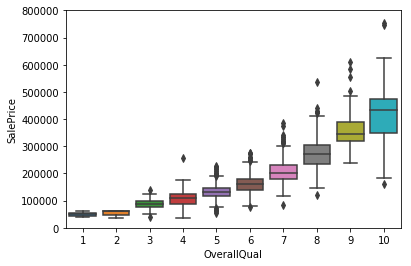

In [13]:
# box plot overalQual/SalePrice
var = 'OverallQual'
data = pd.concat([train['SalePrice'],train[var]],axis=1)
fig = sns.boxplot(x=var,y='SalePrice', data = data)
fig.axis(ymin=0, ymax=800000)
#fig.axis(ylim = (0,800000))

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

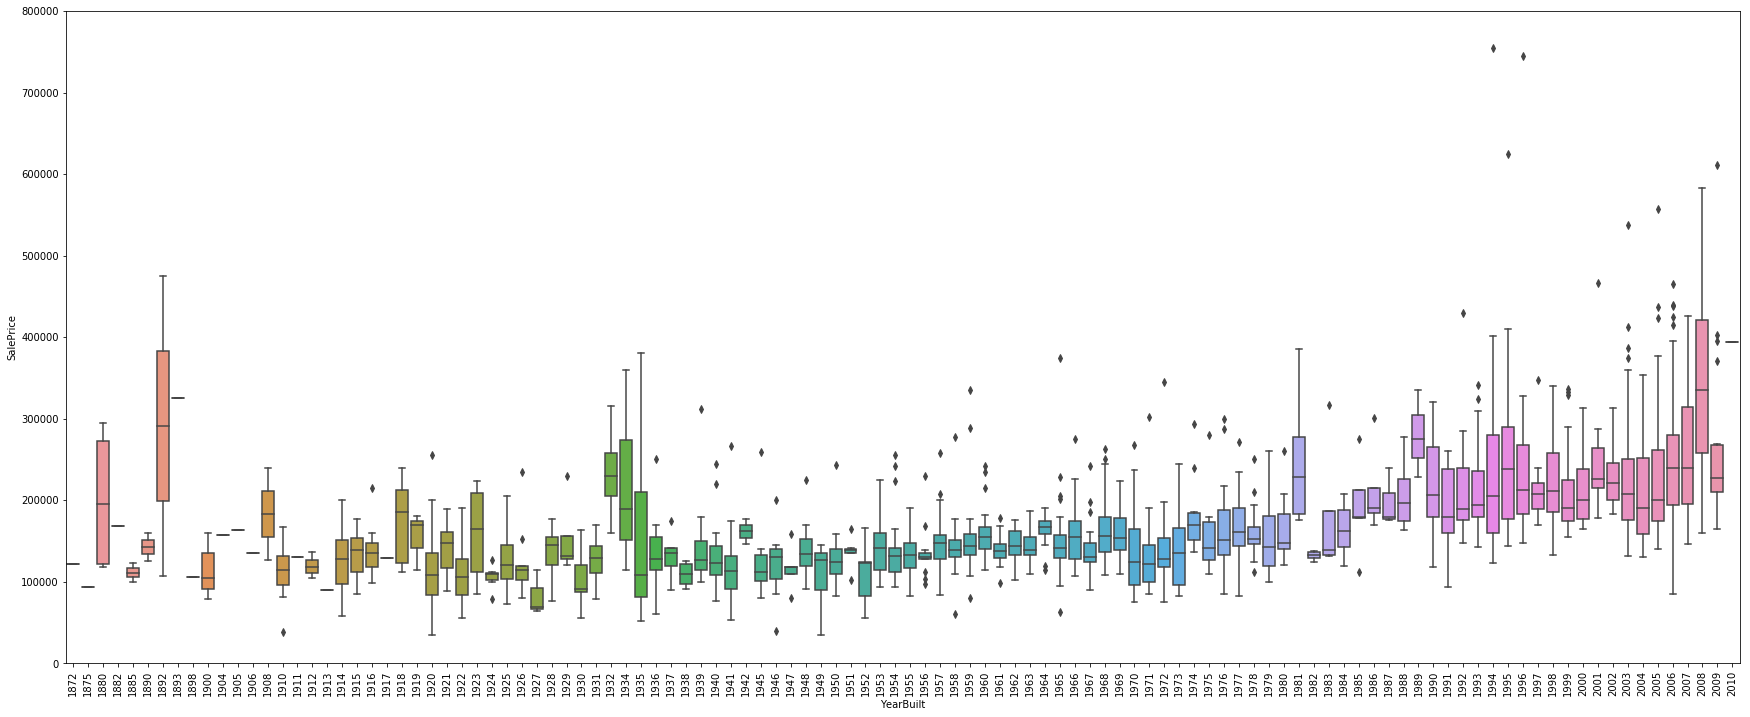

In [14]:
# box plot YearBuilt/SalePrice
var = 'YearBuilt'
data = pd.concat([train['SalePrice'],train[var]],axis=1)
f,ax = plt.subplots(figsize=(30,12))
fig = sns.boxplot(x=var,y='SalePrice', data = data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)

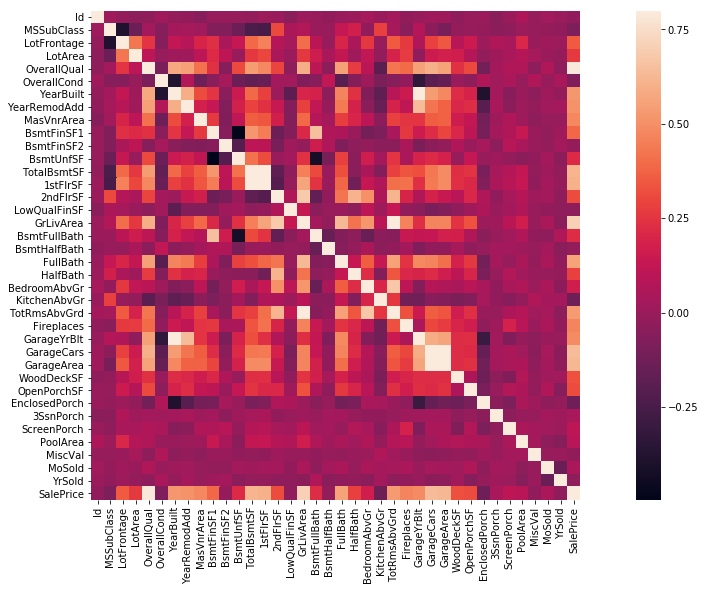

In [15]:
# Correlation matrix(Using heatmap)
corrmat = train.corr()
f,ax = plt.subplots(figsize=(20,9))
sns.heatmap(corrmat,vmax=0.8,square =True)

In [16]:
# as we can see from the above pic, the more red color with SalePrice, the correaltion between this two more strong,such as

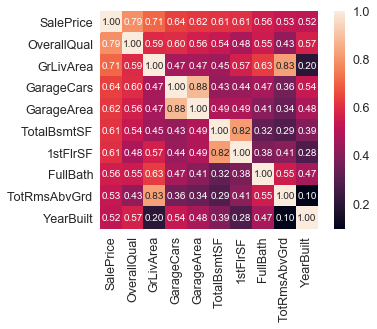

In [17]:
# 'SalePrice' correalation matrix
k = 10
cols = corrmat.nlargest(k,'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [18]:
# As we can see from the above pic, we can see the ten strong correlation features with SalePrice, and the score is show in the map

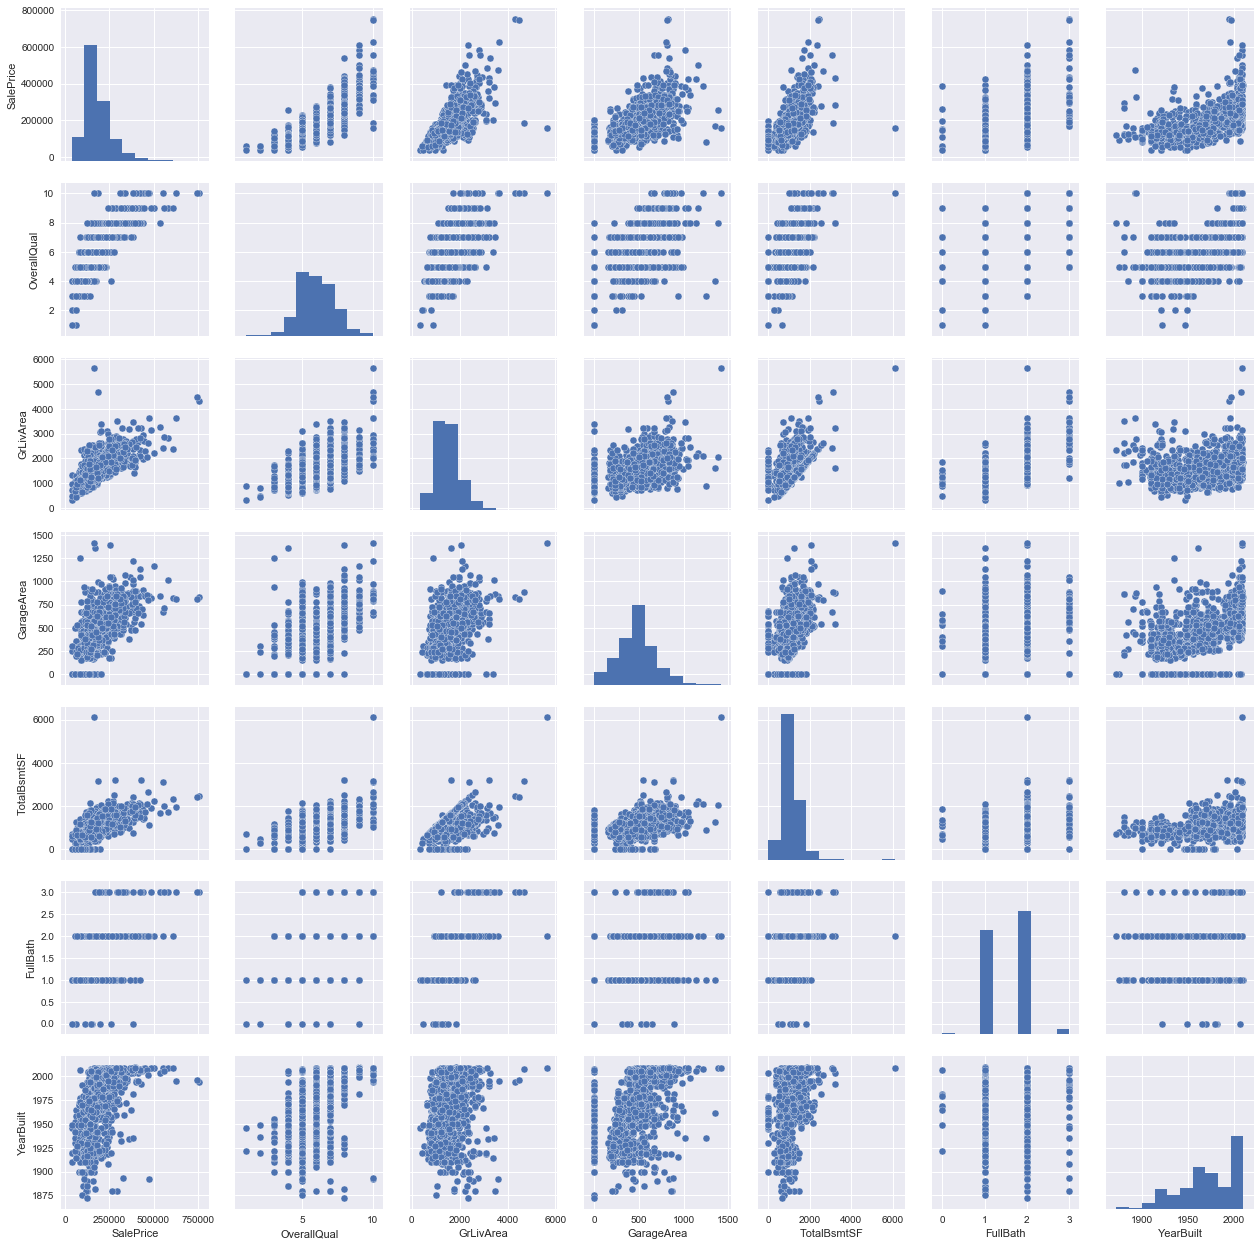

In [19]:
# Scatter plots between SalePrice and correlated variables
sns.set()
cols =['SalePrice','OverallQual','GrLivArea','GarageArea','TotalBsmtSF','FullBath','YearBuilt']
sns.pairplot(train[cols],size=2.5)
plt.show()

In [20]:
#Missing data
cols =['SalePrice','OverallQual','GrLivArea','GarageArea','TotalBsmtSF','FullBath','YearBuilt']
train[cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
SalePrice      1460 non-null int64
OverallQual    1460 non-null int64
GrLivArea      1460 non-null int64
GarageArea     1460 non-null int64
TotalBsmtSF    1460 non-null int64
FullBath       1460 non-null int64
YearBuilt      1460 non-null int64
dtypes: int64(7)
memory usage: 79.9 KB


In [21]:
#check for our strongest variables if there are missing values in these features,the answer is no, so we can fit to our model

In [22]:
# Using models
from sklearn import preprocessing
from sklearn import linear_model, svm, gaussian_process
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model.stochastic_gradient import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Lasso
import numpy as np
#from numpy import float64

In [23]:
cols =['SalePrice','OverallQual','GrLivArea','GarageArea','TotalBsmtSF','FullBath','YearBuilt']
x = train[cols].values.astype(np.float64)   # for this, we need to transfer data from int to float64
y = train['SalePrice'].values.astype(np.float64)
x_scaled = preprocessing.StandardScaler().fit_transform(x)
y_scaled = preprocessing.StandardScaler().fit_transform(y.reshape(-1,1))
X_train,X_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.30, random_state=42)

In [24]:
clfs = {
        'svm':svm.SVR(), 
        'RandomForestRegressor':RandomForestRegressor(n_estimators=400),
        'LinearRegression':linear_model.LinearRegression(),
        'DecisionTreeRegressor':DecisionTreeRegressor(),
        'SGDRegressor':SGDRegressor(max_iter=5, tol = None),
        'GradientBoostingRegressor':GradientBoostingRegressor(),
        'MLPRegressor':MLPRegressor(solver='adam', activation = 'logistic',hidden_layer_sizes=5, max_iter=1000, learning_rate='adaptive', random_state= None),
        'Lasso':Lasso(alpha = 0.1,max_iter=1000,random_state=None)
       }
for clf in clfs:
    try:
        clfs[clf].fit(X_train, y_train.ravel('F'))   #why need to make this ravel()??
        y_pred = clfs[clf].predict(X_test)
        #print(clf + " cost:" + str(np.sum(y_pred-y_test)/len(y_pred)))
        print(clf + " score:" + str(np.mean(np.absolute(y_pred-y_test))))
        print(y_pred)
    except Exception as e:
        print(clf + " Error:")
        print(str(e))

svm score:1.0248401179961804
[-4.33264659e-01  1.97223878e+00 -8.69446891e-01 -2.93258813e-01
  1.63879015e+00 -1.19803742e+00  1.27593356e+00 -5.21239686e-01
 -1.14464626e+00 -5.85651281e-01 -4.32378290e-01 -7.38096297e-01
 -2.55118355e-01  3.89461652e-01 -4.85399348e-02 -6.68728003e-01
 -2.31809531e-03 -6.64277189e-01 -7.85147404e-01  5.52548700e-01
 -3.60485348e-01  3.52174019e-01 -1.36268060e-01 -7.37996872e-01
  5.30115259e-02 -4.00697888e-01 -1.46672115e-02 -5.49933892e-01
 -6.09120170e-02  3.29716446e-01 -7.17058154e-01  1.22828942e+00
  4.74486790e-01 -6.11140169e-01  8.50493899e-01 -6.00231013e-01
 -4.63341678e-01  4.38940696e-01  1.72933725e+00 -1.00265063e+00
 -8.62632925e-01  2.86124561e-01 -8.74885254e-01  1.01699006e+00
 -7.21346288e-01 -6.99452141e-01 -9.28268247e-01 -7.59109388e-01
  3.19137469e+00 -4.37841751e-01 -8.75138112e-01  6.19176125e-02
 -7.82734158e-01  1.40605915e+00 -4.42602002e-01  9.77827193e-01
  3.32106781e-01 -1.17929291e-01 -8.13912507e-01 -8.91809831e

MLPRegressor score:1.0160547174176517
[-4.12254047e-01  1.88369998e+00 -8.57812163e-01 -3.37161499e-01
  1.75037432e+00 -1.15470088e+00  1.74286390e+00 -4.52369543e-01
 -1.08952906e+00 -6.37060394e-01 -5.48613183e-01 -7.06842060e-01
 -9.72832075e-01  4.27429713e-01 -1.77432841e-02 -6.57115134e-01
  3.62266736e-02 -6.48018415e-01 -8.16322674e-01  5.83949800e-01
 -3.51687297e-01  3.80653359e-01 -1.18400120e-01 -7.18196836e-01
  1.45862594e-01 -3.36444725e-01 -9.44739777e-04 -5.83761798e-01
 -2.72819728e-02  3.45812556e-01 -7.36705422e-01  1.37509442e+00
  2.29296176e-01 -6.41602629e-01  9.49320237e-01 -5.62786028e-01
 -5.68457976e-01  5.07057884e-01  1.70354955e+00 -1.01790954e+00
 -8.32903403e-01  3.29515168e-01 -8.06802396e-01  7.34189559e-01
 -6.94737851e-01 -7.93061257e-01 -8.54104477e-01 -7.29843798e-01
  2.67657267e+00 -5.32427875e-01 -8.19588355e-01  1.81958805e-01
 -8.47061355e-01  1.41270398e+00 -5.03778435e-01  1.05058147e+00
  4.01498411e-01 -1.53053725e-01 -7.91037987e-01 -9.

In [25]:
# see test result
cols =['OverallQual','GrLivArea','GarageArea','TotalBsmtSF','FullBath','YearBuilt']
x = train[cols].values   # for this, we need to transfer data from int to float64
y = train['SalePrice'].values
X_train,X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

clf = RandomForestRegressor(n_estimators=400)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(y_pred)

[139100.9375     324740.6        120520.6875     162327.175
 298542.425       78586.66666667 193925.7475     152428.98
  78693.5        127881.795      169687.1625     119147.5
 101406.         223146.3025     188997.25       120445.
 193338.40083333 129904.75       121302.635      195483.05
 165005.7625     238332.49166667 176536.988125   120611.125
 189208.8175     169478.51208333 180469.1275     102883.875
 191074.91666667 200676.475      115900.1325     240172.6625
 180889.8425     114952.         254144.28       146036.5
 160161.425      203819.4875     290582.885      110697.5
 135961.56916667 230089.85       116770.275      381435.0125
 140346.25       177424.815      124955.875      122780.075
 421147.9825     148967.0775     120726.625      193686.6625
 130805.03083333 347469.6125     144138.78325216 243209.4125
 191356.3125     153239.4075     154718.4        105898.125
  83703.375      139572.4375     327855.315      298501.1075
 286437.095      217330.6        112942.96    

In [26]:
# test for test set
import pandas as pd
from sklearn import linear_model

rfr = clf

In [27]:
data_test = pd.read_csv('../apartment/test.csv')


In [28]:
data_test[cols].isnull().sum()

OverallQual    0
GrLivArea      0
GarageArea     1
TotalBsmtSF    1
FullBath       0
YearBuilt      0
dtype: int64

In [29]:
data_test['GarageArea'].fillna(1.766118,inplace = True)
data_test['TotalBsmtSF'].fillna(1046.117970,inplace = True)

In [30]:
data_test[cols].isnull().sum()

OverallQual    0
GrLivArea      0
GarageArea     0
TotalBsmtSF    0
FullBath       0
YearBuilt      0
dtype: int64

In [31]:
x = data_test[cols].values
y_tend_pred = rfr.predict(x)
print(y_tend_pred)

print(y_tend_pred.shape)
print(x.shape)

[129138.5        157918.         161743.8775     ... 136447.25
 115789.31666667 231581.225     ]
(1459,)
(1459, 6)


In [32]:
data_test[cols]

,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,FullBath,YearBuilt
0,5,896,730.0,882.0,1,1961
1,6,1329,312.0,1329.0,1,1958
2,5,1629,482.0,928.0,2,1997
3,6,1604,470.0,926.0,2,1998
4,8,1280,506.0,1280.0,2,1992
5,6,1655,440.0,763.0,2,1993
6,6,1187,420.0,1168.0,2,1992
7,6,1465,393.0,789.0,2,1998
8,7,1341,506.0,1300.0,1,1990
9,4,882,525.0,882.0,1,1970


In [33]:
prediction = pd.DataFrame(y_tend_pred, columns=['SalePrice'])
result = pd.concat([data_test['Id'],prediction],axis = 1)
result.columns

Index(['Id', 'SalePrice'], dtype='object')

In [34]:
result.to_csv('../apartment/predict.csv',index = False)

ValueError: Expected 2D array, got 1D array instead:
array=[208500. 181500. 223500. ... 266500. 142125. 147500.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.